# Name : Akshay Naik


# Task number 2 - Exploring Supervised Machine Learning

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the data

In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Inspecting the dataframe


In [78]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   25 non-null     int64
 1   Scores  25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes
None


In [79]:
#Checking for rows and columns of the dataframe

data.shape

(25, 2)

In [80]:
# Looking for the statstical representation of the dataframe

print(data.describe())

print('Here we can observe that overall average hour is 4.6 and overall average score is 47')

           Hours     Scores
count  25.000000  25.000000
mean    4.480000  51.480000
std     2.518597  25.286887
min     1.000000  17.000000
25%     2.000000  30.000000
50%     4.000000  47.000000
75%     7.000000  75.000000
max     9.000000  95.000000
Here we can observe that overall average hour is 4.6 and overall average score is 47


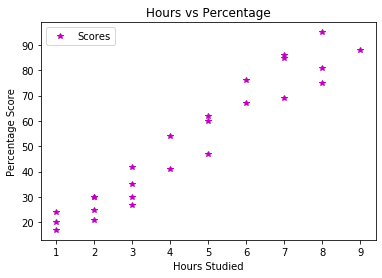

In [81]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='*',color ='m')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.Therefore we can perform Linear regression for this dataset**

#### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [82]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [83]:
#Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
#We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [84]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  

#Fitting the model
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


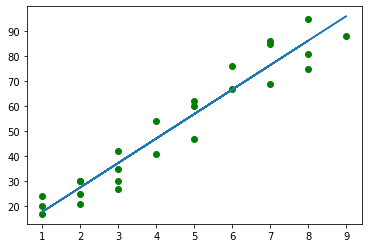

In [86]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y , color = 'g')
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [69]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1]
 [3]
 [7]
 [2]
 [5]]


In [70]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.822866
1,27,37.351047
2,69,76.407407
3,30,27.586957
4,62,56.879227


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [100]:
y_train_pred = regressor.predict(X_train)
res = (y_train - y_train_pred)

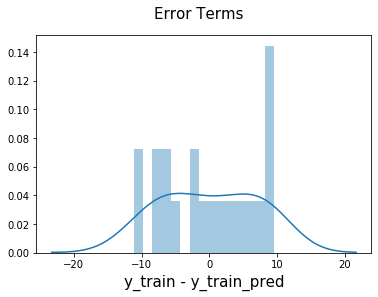

In [101]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

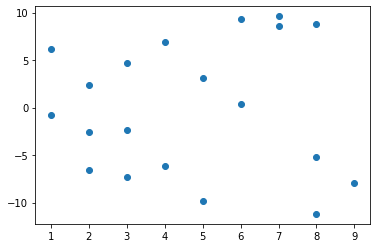

In [102]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

In [46]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [97]:
# R-squared value

r_squared = r2_score(y_test, y_pred)
r_squared

0.8996573502845343

In [92]:
#Returns the mean squared error; we'll take a square root

print('Mean squared Error:', 
      np.sqrt(mean_squared_error(y_test, y_pred)))

Mean squared Error: 6.305534991042087


### Predicting score for a student studying for 9.25 hrs a day.

In [91]:
#Predicting score for student studying for 9.25 hr a day.

hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 98.37661030595814
